$\textbf{GOAL}$ : We want to get a correct ISTA algorithm converging until tolerance given (or not) L value, prox.

*The L-lipschitz constant is known for LASSO but not $\sqrt{LASSO}$ and surely for other $f$. So we will need **backtrack** : choose a "large" L and decreases (dividing by 2) over iterations and see if the loss decreases (accept so L/2).*   

*The prox sera toujours donné dans ce projet car c'est un hypothèse que g soit proximable*   

TODO : S'assurer de l'hyptothese + def d'être proximable (ça veut surement dire que le prox, selon g, est explicite)

In [1]:
using LinearAlgebra, Printf, Statistics, Random

# ISTA

$\textbf{Definition}$
Let $\gamma>0$ and convex function $g : \mathbb{R}^n \to \mathbb{R}$, for $n>0$, we call proximal operator of $g$ with $\gamma$, 
$$
\emph{prox}_{\gamma, g} : v\in \mathbb{R}^n \mapsto \arg\min_{x\in\mathbb R^{n}}\;\Bigl\{\,g(x)+\tfrac1{2\gamma}\|x-v\|_2^2\Bigr\}
$$


Iterative Soft-Thresholding Algorithm (ISTA) is a proximal gradient method, each iteration $(w_k)$ performs a gradient descent step on the smooth loss followed by a soft-thresholding. 

$\textbf{Definition}$
To minimize the problem $f+g$ with $f$ convex, where its differential is $L$-Lipschitz and g convex. We approximate the minimizer $w^*$ by $(w_k)_{k\geq0}$ defined as, $w_0$ an initial point and with the update rule, for $\gamma>0$,
    $$
    w^{(k+1)} \;=\; \mathrm{prox}_{\gamma, g}\!\Big(w_k - \gamma\, \partial f(w_k) \Big)
    $$

# Basic LASSO 

Let $X \in \mathbb{R}^{n \times p}$ and $y \in \mathbb{R}^{n}$

$$
\min_{b \in \mathbb{R}^{p}}
\frac12 \|y - X b\|_{2}^{2}
+ \lambda \|b\|_{1}
\tag{LASSO}
$$


So in this first case, we have a optimization problem under the form $f+g$ with $f=MSE$ and $g = \ell_1$-norm 

$L = X^TX$ because 
$$
\|\partial f(b) - \partial f(a)\|
= \|-X^{T}(y-X b) + X^{T}(y-X a)\|
= \|X^{T}X(b - a)\|
\le \|X^{T}X\|\|b - a\|$$

and then we use $\ell_2$-norm since it allows to the proximal to be explicit.  
So we have the square of largest eigenvalue for $X^TX$ ,

$$||X^TX||_2 = ||X||_2^2

**Proximal**
$$f : w \mapsto \tfrac12\|Aw-b\|_2^2 \quad \text{and} \quad g : w \mapsto \lambda\|w\|_1$$
For $k\geq0$, let $u_k = w_k-\gamma A^\top(Aw_k-b)$. 
Then, $\forall i\in \llbracket 1,n \rrbracket$,
$$
w_{k+1}^{(i)}
=\emph{sign}\bigl(u_k^{(i)}\bigr)\,\max\bigl(|u_k^{(i)}|-\gamma\lambda,0\bigr)
$$


*Proof*  

Since $g$ is separable we have coordinate-wise on $\mathrm{prox}$, hence, for $i \in \llbracket 1,n \rrbracket$,
\begin{equation}
w_{k+1}^{(i)}
=\mathrm{prox}_{\gamma,\lambda|\cdot|}\bigl(u_k^{(i)}\bigr) = 
\arg\min_{x\in\mathbb{R}} \Bigl\{ \lambda|x|+\tfrac{1}{2\gamma}\Bigl(x-u_k^{(i)}\Bigr)^2\Bigr\} \tag{R1}
\end{equation}

From KKT Theorem, we denote $x^*$ the minimizer of (R1) verifying, $$0 \in \partial \Bigl( x\mapsto  \lambda|x|+\tfrac{1}{2\gamma}\Bigl(x-u_k^{(i)}\Bigr)^ 2\Bigr)(x^*) = \lambda \partial|\cdot|_1(x^*) + \frac{1}{\gamma}(x^*-u_k^{(i)})$$

+  $x^{*}>0 \implies 0 = \lambda\cdot1 + \tfrac{1}{\gamma}(x^{*}-u_k^{(i)})
   \;\Longleftrightarrow\;
   x^{*}=u_k^{(i)}-\gamma\lambda$ et $u_k^{(i)}>\gamma\lambda$
   
+ $x^{*}<0 \implies 0 = \lambda\cdot1 + \tfrac{1}{\gamma}(x^{*}-u_k^{(i)})
   \;\Longleftrightarrow\;
   x^{*}=u_k^{(i)}-\gamma\lambda$ et $u_k^{(i)}<-\gamma\lambda$

+ $x^{*}=0 \implies 
   0\in \lambda[-1,1] + \tfrac{1}{\gamma}(0-u_k^{(i)})
   \;\Longrightarrow\;
   u_k^{(i)}\in[-\gamma\lambda,\;\gamma\lambda]
   $

Combining these three cases gives,

$$
w_{k+1}^{(i)}
=x^{*}
=\begin{cases}
u_k^{(i)}-\gamma\lambda, & u_k^{(i)}>\gamma\lambda\\
0, & |u_k^{(i)}|\le\gamma\lambda\\
u_k^{(i)}+\gamma\lambda, & u_k^{(i)}<-\gamma\lambda
\end{cases}
=\mathrm{sign}\bigl(u_k^{(i)}\bigr)\,\max\bigl\{|u_k^{(i)}|-\gamma\lambda,\;0\bigr\}
$$

In [87]:
for i in  exp.(range(log(4/100), log(4), length = 5))
    println(i)
end

0.04000000000000001
0.12649110640673522
0.4
1.2649110640673518
4.0


In [1]:
prox(x, τ) = sign(x) * max(abs(x) - τ, zero(x))

prox (generic function with 1 method)

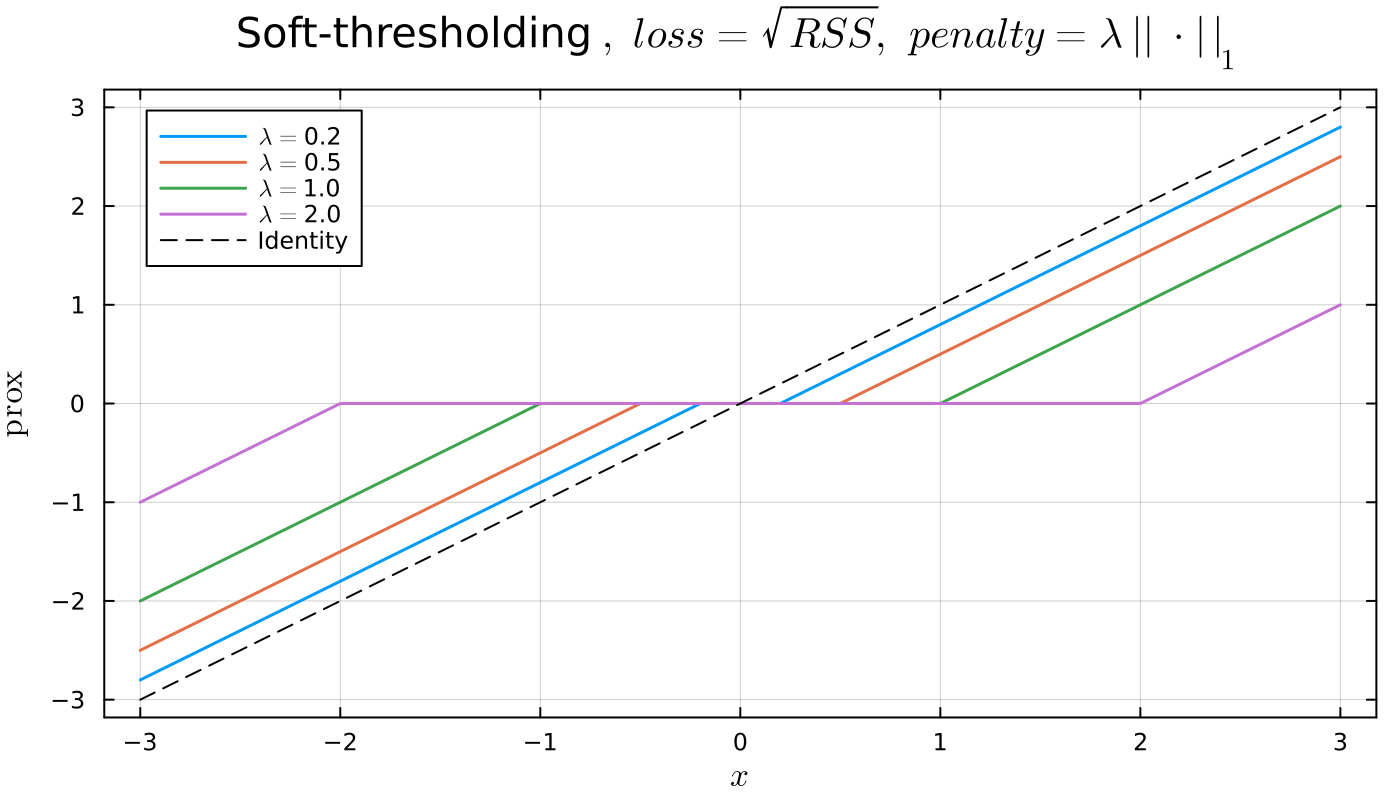

In [75]:
using Plots
using LaTeXStrings

x = range(-3, 3, length=500)
lambdas = [0.2, 0.5, 1.0, 2.0]

plt = plot(size=(700,400),
    xlabel = L"x",
    ylabel = L"\operatorname{prox}",
    title = "Soft-thresholding "*L", \ loss = \sqrt{RSS}, \ penalty = \lambda \ \|\|\cdot\|\|_{1}",
    legend = :topleft,
    framestyle = :box,
    grid = true,
    dpi = 200,
    top_margin = 15Plots.px
)

for (λ, c) in zip(lambdas, colors)
    plot!(x, prox.(x, λ), 
        label = L"λ ="*"$λ", linewidth=1.5)
end

# Ajoute la diagonale x ↦ x
plot!(x, x, label = "Identity", color = :black, linestyle = :dash)


In [76]:
savefig("l1_prox"*".svg")

"c:\\Users\\Le R\\Desktop\\Code\\Projets\\Geneve\\STAGE-GENEVE\\RAPHAEL\\notebook_explain\\l1_prox.svg"

### Simple (primal)

We run the algroithm while the difference value of the cost function (f+g) at two consecutive iteration is below than $\epsilon$

In [4]:
function ista_basic_lasso(X, y, λ, prox;
        max_iter = 100_000, tol = 1e-9,print_freq = 1000, verbose = true
    )
    m, p = size(X)
    L = opnorm(X)^2 # Lipschitz constant of ∇½‖y-Xβ‖²
    step = 1/L #in ]0,2/L[ so linearly convergent
    β = zeros(eltype(X), p)
    β_next = similar(β)
    r = copy(y) # residual
    # Initial cost value
    cost_prev = Inf
    
    for k in 1:max_iter
        # Gradient step
        grad = -(X' * r) # ∇½‖y-Xβ‖²
        β_next .= prox.(β .- step .* grad, λ*step)
        mul!(r, X, β_next)
        @. r = y - r
        cost_current = 0.5*dot(r,r) + λ*sum(abs, β_next)
    
        if abs(cost_current - cost_prev) < tol
            β .= β_next
            if verbose
                @printf("[ISTA] END iter %5d  cost=%.3e  diff=%.3e\n", k, cost_current, abs(cost_current - cost_prev))
            end
            break
        end
        
        if verbose && (k == 1 || k % print_freq == 0)
            @printf("[ISTA]  iter %5d  cost=%.3e  diff=%.3e\n", k, cost_current, abs(cost_current - cost_prev))
        end
        cost_prev = cost_current
        β .= β_next
        
    end
    
    return β
end

ista_basic_lasso (generic function with 1 method)

### GAP

For my project (screen cleaning), I use ISTA until the solution was $\epsilon$-optimal (the solution under the primal, there : $f+g$) and this is possible according to the gap function after definind the dual
$$
  (\mathcal{D}_\lambda) : 
  \max_{u\in\mathbb{R}^m}\; -\tfrac12\|u\|_{2}^{2} + \langle u,y\rangle  
  \quad\text{s.t.}\quad \|A^Tu\|_\infty\le\lambda$$

  and we stop the algorithm when $\mathcal{G}(x_k,u_k) := P(x_k)-D(y-Ax_k) \leq \epsilon$ with $u_k:=y-Ax_k$ the corresponding point in the dual from the primal.

In [31]:
function ista_basic_lasso_gap(X, y, λ, prox;
        max_iter = 100_000,tol = 1e-9,print_freq = 1000, verbose = true
    )
    m, p  = size(X)
    L = opnorm(X)^2 # Lipschitz constant of ∇½‖y-Xβ‖²
    step = 1/L #in ]0,2/L[ so linearly convergent
    β = zeros(eltype(X), p)
    r = copy(y) # residual

    for k in 1:max_iter
        grad  = -(X' * r) # ∇½‖y-Xβ‖²
        β .= prox.(β .- step .* grad, λ*step) 
        mul!(r, X, β) # r = Xβ
        @. r = y - r
        primal = 0.5*dot(r,r) + λ*sum(abs,β)
        θ = r .* min(one(eltype(X)), λ / maximum(abs.(X' * r)))  # dual projection
        dual = 0.5*dot(y,y) - 0.5*dot(y .- θ, y .- θ)
        gap = max(primal - dual, 0.0) # >= 0

        if verbose && (k == 1 || k % print_freq == 0)
            @printf("[ISTA]  iter %5d  gap=%.3e\n", k, gap)
        end
        
        if verbose && gap < tol
            @printf("[ISTA] END iter %5d cost=%.3e gap=%.3e\n", k, primal, gap)
            break # or return
        end
    end
    return β
end


ista_basic_lasso_gap (generic function with 1 method)

## Test

In [32]:
n, p = 100, 50
Random.seed!(42)
X = randn(n, p)
sigma = 0.1
y = X * randn(p) + sigma * randn(n)
λ = 0.1

0.1

In [33]:
beta_1 = ista_basic_lasso(X, y, λ, prox, tol=1e-9)
beta_2 = ista_basic_lasso_gap(X, y, λ, prox, tol=1e-9)
;

[ISTA]  iter     1  cost=7.895e+02  diff=Inf
[ISTA] END iter   259  cost=4.280e+00  diff=9.353e-10
[ISTA]  iter     1  gap=7.876e+02
[ISTA] END iter   672 cost=4.280e+00 gap=9.652e-10


In [34]:
maximum(abs.(beta_1 - beta_2))

1.4914334963922471e-5

# General function *(f, g, L, prox given)*

Precedents functions use primal, dual which depend on f and g, so we give, inspired from the first algorithm, ISTA function with prox given and the L Lispitchz constant given.

In [5]:
function ista_L(x0, f, g, ∇f, L, prox;
        max_iter = 100_000, tol = 1e-9,print_freq = 1000, verbose = true
    )
    x = copy(x0)
    x_next = similar(x)
    
    step = 1/L
    cost_prev = f(x) + g(x)
    for k in 1:max_iter
        grad = ∇f(x)
        x_next .= prox(x .- step .* grad, step)
        
        cost_current = f(x_next) + g(x_next)
        if abs(cost_current - cost_prev) <tol
            x .= x_next
            if verbose
                @printf("[ISTA] END iter %5d  cost=%.3e  diff=%.3e\n", k, cost_current, abs(cost_current - cost_prev))
            end
            break
        end
        if verbose && (k == 1 || k % print_freq == 0)
            @printf("[ISTA] iter %5d  cost=%.3e  diff=%.3e\n", k, cost_current, abs(cost_current - cost_prev))
        end
    
        cost_prev = cost_current
        x .= x_next
    end
    
    return x
end

ista_L (generic function with 1 method)

## Test

In [6]:
n, p = 100, 50
Random.seed!(42)
X = randn(n, p)
sigma = 0.1
y = X * randn(p) + sigma * randn(n)
λ = 0.1

0.1

### LASSO

On est censé tombé sur les memes résultats que précédemment. C'est le cas, la différence est nulle.

In [7]:
f(b) = 0.5*norm(y-X*b,2)^2
∇f(b) = -X'*(y - X*b)
g(x) = λ*sum(abs, x) # L1 norm
prox_L(x, step) = sign.(x) .* max.(abs.(x) .- λ*step, zero(x))

beta0 = zeros(p)# initial conditions

beta_L = ista_L(beta0, f, g, ∇f, opnorm(X)^2, prox_L, tol=1e-9)

println("Différence entre beta_L et beta_1 : ", maximum(abs.(beta_L.-beta_1))) # beta_1 was defined earlier and has to be the same as beta_L

[ISTA] iter     1  cost=7.895e+02  diff=1.733e+03
[ISTA] END iter   259  cost=4.280e+00  diff=9.353e-10


UndefVarError: UndefVarError: `beta_1` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

### Others

TODO : find interesting problem with confirmed (known / analytic) result to compare

## Comparisons

In [2]:
include("../../comp_translate/SaveLoadTxt.jl") # Assuming you have a SaveLoadTxt.jl file with the necessary functions
using .SaveLoadTxt

### Setup

In [39]:
n, p = 100, 50
Random.seed!(42)
X = randn(n, p) # send to txt
sigma = 0.1
y = X * randn(p) + sigma * randn(n) # send to txt
λ = 0.1

0.1

In [3]:
n = 20
p = 50
s = 5
Random.seed!(42)
X = randn(n, p)
# y = cos(x_1) + x_2^2 - x_3 + exp(x_4) - x_5 + 0.1 * N(0,1)
y = cos.(X[:,1]) .+ X[:,2].^2 .- X[:,3] .+ exp.(X[:,4]) .- X[:,5] .+ 0.1 * randn(n)

20-element Vector{Float64}:
  5.63276564167001
  7.896714178783123
  2.6338764747467405
  6.470731914449038
  6.5366768803599316
  2.945073430004307
  5.9068155081779
 -0.113890931084082
  2.763895945668782
  3.6524603594627396
  0.4516617407823562
  4.629507248600716
  9.191029156741171
  1.4504734493678841
  2.170477647727463
  1.303366972311543
  2.5378656899326892
  0.784154086027785
  0.8711061919758911
  2.2650279362784307

In [40]:
dump_txt("../../comp_translate/data/ISTA.txt", [X, y]; append = false)

loaded = load_txt("../../comp_translate/data/ISTA.txt")
@assert loaded == [X,y]
println("Round-trip OK ")

Round-trip OK 


In [41]:
X, y = load_txt("../../comp_translate/data/ISTA.txt")

2-element Vector{Any}:
 [-0.36335748145177754 1.7081843190508057 … -0.263208317752874 -0.6082027770693206; 0.2517372155742292 -1.0310474066155366 … 1.7649065326617626 -1.1552930517326399; … ; 0.3682069358154837 -1.529323847225266 … 1.506239239185287 0.8232577070328778; -0.04656094092083756 -0.19509907821117517 … 0.17077303483751144 0.1123281811728438]
 [-2.4522781251524863, 12.178350834823886, 4.57918453777345, 6.4743636007976235, -5.362304725560138, -1.5621900454469952, 5.104743872498451, -7.681676891856984, -7.023808087048749, 6.1632229078781195  …  -8.185326480885738, -4.813068524860786, -5.422785548383902, -8.529954505127906, 5.896744823913999, 4.339228886005578, 15.502578253982156, -16.028233010456333, -7.632580130984141, 2.550842146325011]

### Results

In [42]:
f(b) = 0.5*norm(y-X*b,2)^2
∇f(b) = -X'*(y - X*b)
g(x) = λ*sum(abs, x) # L1 norm
prox_L(x, step) = sign.(x) .* max.(abs.(x) .- λ*step, zero(x))

beta0 = zeros(p)# initial conditions

beta_L = ista_L(beta0, f, g, ∇f, opnorm(X)^2, prox_L, tol=1e-9)

[ISTA] iter     1  cost=7.895e+02  diff=1.733e+03
[ISTA] END iter   259  cost=4.280e+00  diff=9.353e-10


50-element Vector{Float64}:
 -0.22168095244552247
 -0.8107653026832372
  1.2197383161992026
  2.1296535700264316
  0.8582163017697456
 -0.3170644602288678
  0.6493981399795815
 -0.27916298733368494
  1.1051369784749918
 -0.11074684894907925
  ⋮
  0.26028307597754174
  2.00004079306363
 -0.2744035476875923
 -1.1161825448531286
 -1.231318053803642
  0.11211515350120801
 -0.9711088091666977
 -0.329614416022857
 -0.15895911615979455

# General function BackTrack *(f, g, $L_0$, prox given)*

If we known the gradient of f is L-Lipschitz but without an explicit expression (or even majoration) of L we can do backtracking.  

We start with a small L0 (<span style="color:red"><b>TODO :</b></span> trouver une manière de le faire) and at each iteration according to some conditions we can improve the constant used to be more precise until the convergence.

For any $\gamma>0$ and $y\in\mathbb R^{n}$ we define
$$
\mathcal Q_\gamma(x,y):=
f(y)+\langle x-y,\nabla f(y)\rangle+\frac1{2\gamma}\|x-y\|_2^2+g(x)
$$

Minimising this quadratic yields the point

$$
P_\gamma(y):=\operatorname*{argmin}_{x\in\mathbb R^{n}},
\mathcal Q_\gamma(x,y)
=\operatorname{prox}_{\gamma g}\bigl(y-\gamma\nabla f(y)\bigr)
$$

From *Lemma 2.3*, we have the test,
> A Fast Iterative Shrinkage-Thresholding Algorithm
for Linear Inverse Problems.  
Amir Beck and Marc Teboulle
 

$$
F\bigl(P_\gamma(y)\bigr)\le\mathcal Q_\gamma\bigl(P_\gamma(y),y\bigr)
$$

In [43]:
function ista(x0, f, g, ∇f, L0, prox;
        eta = 2.0, max_iter = 100_000,tol= 1e-9,print_freq = 1000,verbose = true)

    x  = copy(x0)
    x_new  = similar(x)
    F_prev = f(x) + g(x) # coût initial
    F_new = 0
    L      = L0

    for k in 1:max_iter
        grad = ∇f(x)

        L_trial = L
        while true
            step = 1/L_trial
            x_new .= prox(x .- step .* grad, step)

            diff = x_new .- x
            f_new = f(x_new)
            g_new = g(x_new)
            F_new = f_new + g_new

            Q_val = f(x) + dot(diff, grad) + (L_trial/2) * dot(diff, diff) + g_new  # majorant

            F_new ≤ Q_val + eps() && break # critère BT
            L_trial *= eta
            if L_trial > 1e12                 
                error("Backtracking diverged : L trop grand")
            end
        end
        L = L_trial                            # prochain tour part de L_trial

        if verbose && (k == 1 || k % print_freq == 0)
            @printf("[ISTA-BT] iter %6d  cost = %.3e  ΔF = %.3e  L = %.3e\n",
                    k, F_new, abs(F_prev - F_new), L)
        end
        if abs(F_prev - F_new) < tol 
            if verbose
                @printf("[ISTA-BT] END iter %5d  cost=%.3e  diff=%.3e\n", k, F_new, abs(F_prev - F_new))
            end
            return x_new
        end

        x .= x_new
        F_prev = F_new
    end
    return x
end


ista (generic function with 1 method)

## Test

In [44]:
n, p = 100, 50
Random.seed!(42)
X = randn(n, p)
sigma = 0.1
y = X * randn(p) + sigma * randn(n)
λ = 0.1

0.1

### LASSO

In [45]:
f(b) = 0.5*norm(y-X*b,2)^2
∇f(b) = -X'*(y - X*b)
g(x) = λ*sum(abs, x) # L1 norm
prox_L(x, step) = sign.(x) .* max.(abs.(x) .- λ*step, zero(x))
L0 = 0.0001 # small L0; assuem we don't know the real value of L

beta0 = zeros(p)# initial conditions
beta_BT = ista(beta0, f, g, ∇f, L0, prox_L, eta=2, tol=1e-9, verbose = false)

println("Différence entre beta_L et beta_BT : ", maximum(abs.(beta_L.-beta_BT))) # beta_1 was defined earlier and has to be the same as beta_L

Différence entre beta_L et beta_BT : 1.990740268853486e-6


## Comparisons

### Setup

In [46]:
n, p = 100, 50
Random.seed!(42)
sigma = 0.1
λ = 0.1
L0 = 0.0001 # small L0; assume we don't know the real value of L
X, y = load_txt("../../comp_translate/data/ISTA.txt")

2-element Vector{Any}:
 [-0.36335748145177754 1.7081843190508057 … -0.263208317752874 -0.6082027770693206; 0.2517372155742292 -1.0310474066155366 … 1.7649065326617626 -1.1552930517326399; … ; 0.3682069358154837 -1.529323847225266 … 1.506239239185287 0.8232577070328778; -0.04656094092083756 -0.19509907821117517 … 0.17077303483751144 0.1123281811728438]
 [-2.4522781251524863, 12.178350834823886, 4.57918453777345, 6.4743636007976235, -5.362304725560138, -1.5621900454469952, 5.104743872498451, -7.681676891856984, -7.023808087048749, 6.1632229078781195  …  -8.185326480885738, -4.813068524860786, -5.422785548383902, -8.529954505127906, 5.896744823913999, 4.339228886005578, 15.502578253982156, -16.028233010456333, -7.632580130984141, 2.550842146325011]

### Results

In [47]:
f(b) = 0.5*norm(y-X*b,2)^2
∇f(b) = -X'*(y - X*b)
g(x) = λ*sum(abs, x) # L1 norm
prox_L(x, step) = sign.(x) .* max.(abs.(x) .- λ*step, zero(x))

beta0 = zeros(p)# initial conditions

beta_L = ista(beta0, f, g, ∇f, L0, prox_L, eta=2, tol=1e-9)

[ISTA-BT] iter      1  cost = 5.510e+02  ΔF = 1.972e+03  L = 2.097e+02
[ISTA-BT] END iter   190  cost=4.280e+00  diff=9.837e-10


50-element Vector{Float64}:
 -0.22167995333563506
 -0.8107652522629043
  1.2197375579068204
  2.1296538608835527
  0.8582167300402902
 -0.3170641266586662
  0.649398776181477
 -0.2791640098707406
  1.1051361208805932
 -0.11074599258859008
  ⋮
  0.26028289521126513
  2.00004090705919
 -0.2744025520117581
 -1.1161821692284422
 -1.2313182193942989
  0.1121157896388718
 -0.9711074507853379
 -0.3296148198074906
 -0.15895951290181398